# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [192]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

This visualization has a clear title, clearly labels each bar, and has the percentage of each category above each bar, which is nice. The bars are equal width and the categories are dispalyed in a logical order. But good Lord are there problems. There is no scale on the y axis so I am not sure what the scale is. There are horizontal bars across as reference which is nice, but they aren't labelled so we don't know what the reference lines are. The bars don't match their percentages! The 13% has the biggest bar, despite being the lowest percentage. The 28% has no bar at all, potentially insinuating that the y scale doesn't start at 0 since there is no 0%.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

This is a pie chart with clearly labelled slices with percentages and a title in the upper right hand corner. However, this pie chart clearly violates the principle of proportional ink in mulitple ways. First, it is a 3D pie chart, which adds more area to certain areas slices but not others. Second, they have this spiraling type feature where the smallest percentage has a small slice, then each slices has a slightly bigger section (like a bigger radius). This makes the areas VERY misleading. Also, they repeated colors which makes it confusing.

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

I'm not sure where to start on this one. I guess the graph is clearly labelled and there's both an x and a y scale (though the x could be a little clearer). Without too much thought it's easy to deduce that each dot is a year (though the fact that I had to think about it is not great and it is hard to tell which year is which). They also labelled some helpful items like the first and last data point as well as when an important legislation was passed pertaining to the topic. While the graph is clearly labelled, it has two title? Or at least a title and a subtitle. For one graph? That seems like they could have done a better job. The thing that baffles me is why is 0 on the top for the y scale and then the graph goes down when the numbers are increasing? That's so confusing. Also, why is it red? I assume that it's red for blood since they're talking about deaths, but it does not add any clarity. I guess I give them creativity points becuase it kind of looks like blood dripping down a wall, like after a gunshot? 

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [193]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [194]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [195]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category')
gss_clean['relationship'] = gss_clean['relationship'].cat.reorder_categories(new_categories=["strongly agree", "agree", "disagree", "strongly disagree"], ordered=True)

Text(0.5, 1.0, "Frequency of Levels of Agreement for a Working Mother's Relationship")

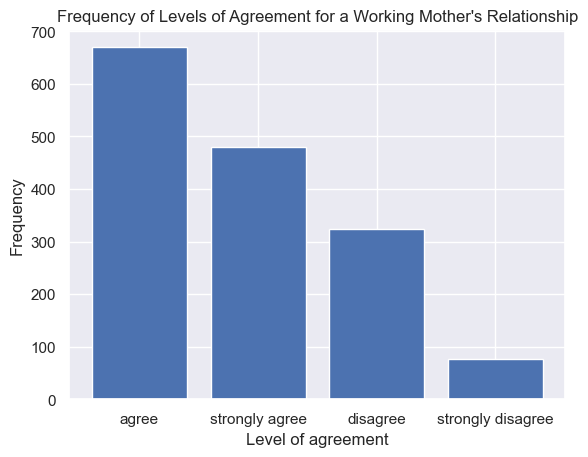

In [196]:
plt.bar(gss_clean['relationship'].value_counts().index, gss_clean['relationship'].value_counts().values)
plt.xlabel('Level of agreement')
plt.ylabel('Frequency')
plt.title('Frequency of Levels of Agreement for a Working Mother\'s Relationship')

Text(0.5, 1.0, "Frequency of Levels of Agreement for a Working Mother's Relationship")

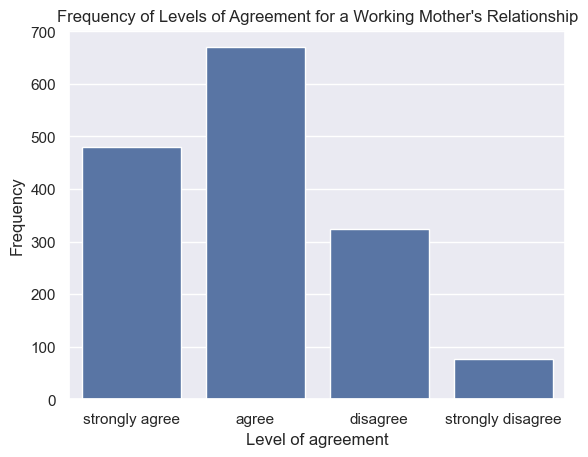

In [197]:
sns.barplot(x=gss_clean['relationship'].value_counts().index, y=gss_clean['relationship'].value_counts().values)
plt.xlabel('Level of agreement')
plt.ylabel('Frequency')
plt.title('Frequency of Levels of Agreement for a Working Mother\'s Relationship')

Text(0.5, 1.0, "Frequency of Levels of Agreement for a Working Mother's Relationship")

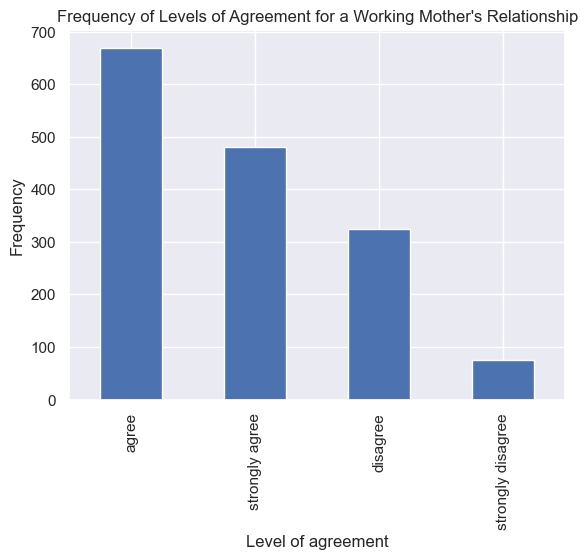

In [198]:
gss_clean['relationship'].value_counts().plot(kind='bar')
plt.xlabel('Level of agreement')
plt.ylabel('Frequency')
plt.title('Frequency of Levels of Agreement for a Working Mother\'s Relationship')

I know I didn't change the figure size on each graph, but they show up plenty big on my screen.

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

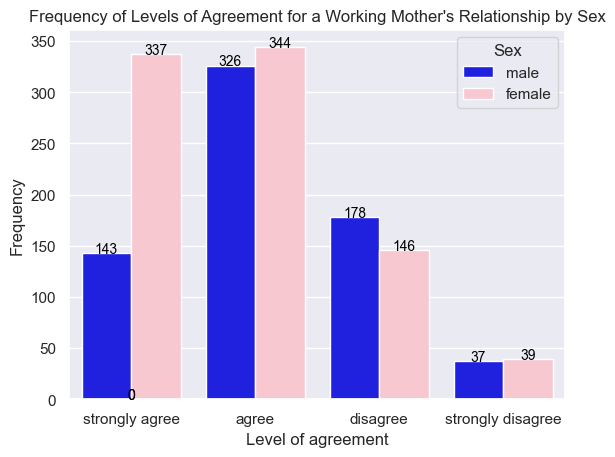

In [199]:
sns.countplot(x='relationship', hue='sex', data=gss_clean, palette={'male': 'blue', 'female': 'pink'})
plt.xlabel('Level of agreement')
plt.ylabel('Frequency')
plt.title('Frequency of Levels of Agreement for a Working Mother\'s Relationship by Sex')
plt.legend(title='Sex')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

C:\Users\brian\AppData\Local\Temp\ipykernel_34860\2412445982.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = gss_clean.pivot_table(index='relationship', columns='sex', values='count', aggfunc='sum')


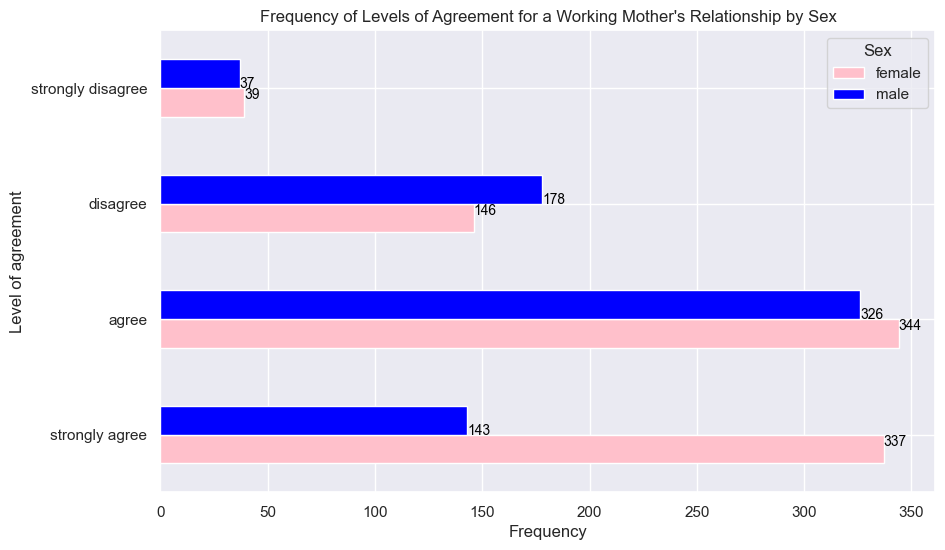

In [200]:
gss_clean['count'] = 1
pivot_df = gss_clean.pivot_table(index='relationship', columns='sex', values='count', aggfunc='sum')
pivot_df.plot(kind='barh', stacked=False, color={'male': 'blue', 'female': 'pink'}, figsize=(10, 6))
plt.xlabel('Frequency')
plt.ylabel('Level of agreement')
plt.title('Frequency of Levels of Agreement for a Working Mother\'s Relationship by Sex')
plt.legend(title='Sex')
for index, value in enumerate(pivot_df.values):
    plt.gca().text(value[0], index, str(int(value[0])), color='black', va='top', ha='left', fontsize=10)
    plt.gca().text(value[1], index, str(int(value[1])), color='black', va='baseline', ha='left', fontsize=10)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

C:\Users\brian\AppData\Local\Temp\ipykernel_34860\1760358911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gss_facet = gss_clean.groupby(['relationship', 'region']).agg({'count': 'sum'}).reset_index()
c:\Users\brian\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\brian\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\brian\AppData\Local\Programs\Python\Python312\L

Text(0.5, 0.98, 'Distribution of Relationship Levels by Region')

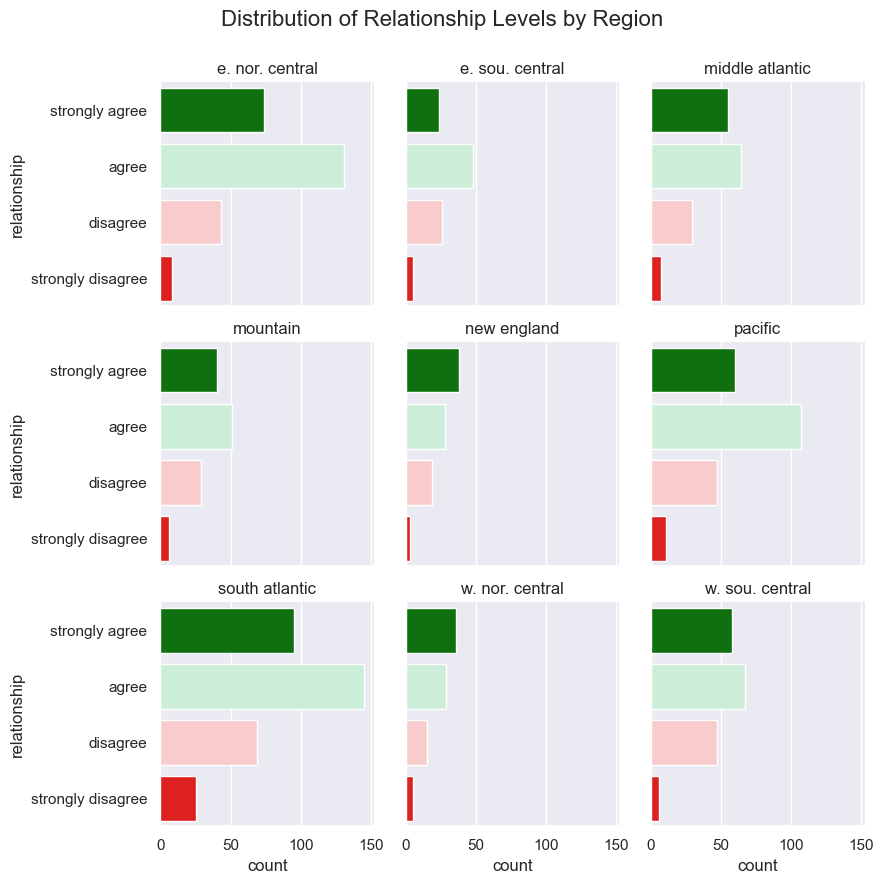

In [201]:
gss_facet = gss_clean.groupby(['relationship', 'region']).agg({'count': 'sum'}).reset_index()

c = sns.FacetGrid(gss_facet, col='region', hue='relationship', col_wrap=3)
c.map(sns.barplot, 'count', 'relationship', palette={'strongly agree': 'green', 'agree': '#c6f4d6', 'disagree': '#ffc5c5', 'strongly disagree': 'red'})
c.set_titles('{col_name}')
c.set_axis_labels('count') 
c.fig.subplots_adjust(top=.9)
c.fig.suptitle('Distribution of Relationship Levels by Region', fontsize=16)

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [202]:
gss_3a = gss_clean[gss_clean['education'].between(8, 20)].groupby('education').agg({'job_prestige': 'mean', 'socioeconomic_index': 'mean'}).reset_index()
gss_3a = pd.melt(gss_3a, id_vars=['education'], value_vars=['job_prestige', 'socioeconomic_index'], var_name='Index', value_name='mean')
gss_3a

,education,Index,mean
0,8.0,job_prestige,34.575758
1,9.0,job_prestige,37.416667
2,10.0,job_prestige,35.516667
3,11.0,job_prestige,37.494118
4,12.0,job_prestige,39.041667
5,13.0,job_prestige,40.988571
6,14.0,job_prestige,44.095710
7,15.0,job_prestige,43.616667
8,16.0,job_prestige,51.905213
9,17.0,job_prestige,53.885417


Text(0.5, 1.0, 'Occupational Prestige and Socioeconomic Index vs.y Years of Education')

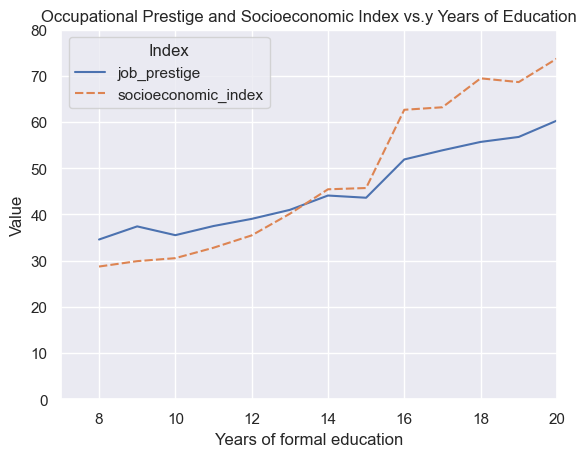

In [203]:
lg = sns.lineplot(x='education', y='mean',
             hue='Index', style='Index',
             data=gss_3a)
lg.set(xlim=(7,20), ylim=(0, 80))
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socioeconomic Index vs.y Years of Education')

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

In [204]:
gss_3b = gss_clean.loc[:, ['job_prestige', 'father_job_prestige', 'mother_job_prestige', 'income', 'socioeconomic_index']].corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'job_prestige'),
  Text(0, 1.5, 'father_job_prestige'),
  Text(0, 2.5, 'mother_job_prestige'),
  Text(0, 3.5, 'income'),
  Text(0, 4.5, 'socioeconomic_index')])

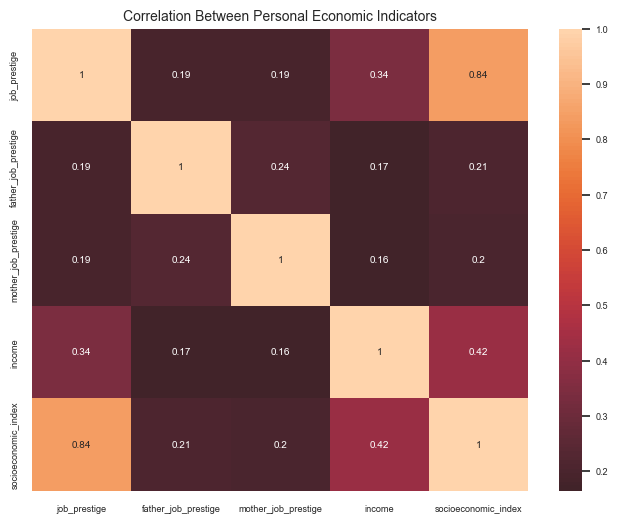

In [205]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=.6)
sns.heatmap(gss_3b, annot=True, center=0)
plt.title('Correlation Between Personal Economic Indicators', fontsize=10)
plt.xticks(rotation=0)
plt.yticks(rotation=90)

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

In [206]:
gss_3c = gss_clean
gss_3c = gss_3c.assign(education_years =
                       pd.cut(gss_3c.education,
                              bins=[-1, 10, 11, 12, 13, 14, 15, 16, 20],
                              labels=("10 years or fewer", "11 years", "12 years", "13 years", "14 years", "15 years", "16 years", "More than 16 years")))

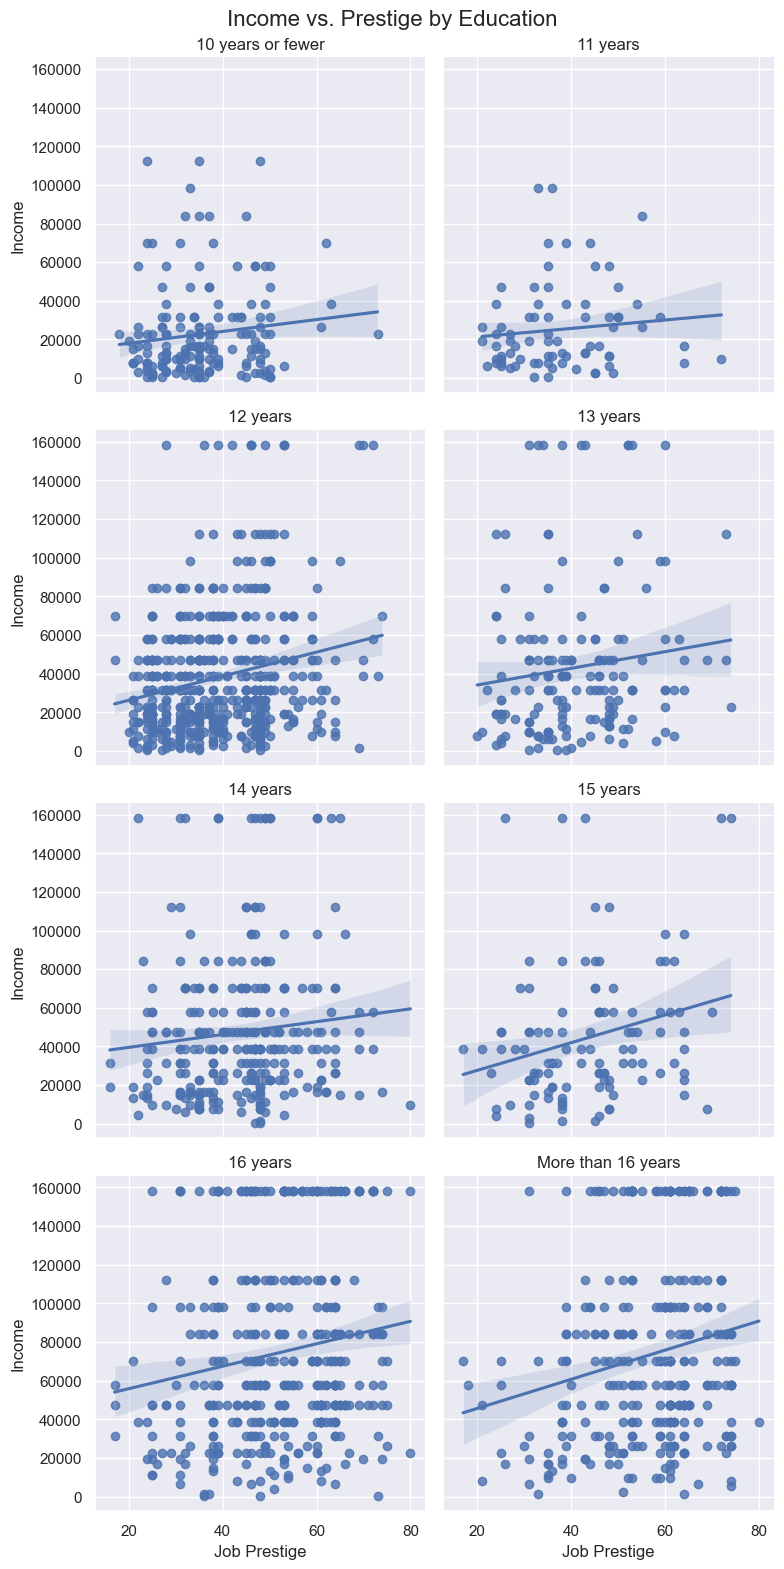

In [207]:
sns.set(font_scale=1)
g = sns.FacetGrid(gss_3c, col='education_years', height=4, aspect=1, col_wrap=2)
g.map(sns.regplot, 'job_prestige', 'income')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
g.set_axis_labels('Job Prestige', 'Income', fontsize=12)

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

In [208]:
gss_clean.groupby('sex').agg({'income': 'mean'})

,income
sex,
female,47191.021452
male,53314.626187


In [209]:
53314.626187 - 47191.021452

6123.604735000001

In [210]:
47191.021452 / 53314.626187

0.8851421237856648

In [211]:
gss_clean.groupby('sex').agg({'income': 'median'})

,income
sex,
female,38555.0
male,38555.0


In [212]:
p4a = gss_clean.groupby(['job_prestige', 'sex']).agg({'income': 'count'}).reset_index()
p4a = p4a.rename(columns={'income': 'count'})
p4b = gss_clean.groupby(['job_prestige', 'sex']).agg({'income': 'mean'}).reset_index()
p4 = pd.merge(p4a, p4b, how='inner', on=['job_prestige', 'sex'])
p4

,job_prestige,sex,count,income
0,16.0,female,2,25411.250000
1,17.0,female,6,52575.000000
2,17.0,male,1,47317.500000
3,18.0,female,2,40307.500000
4,20.0,male,3,12267.500000
...,...,...,...,...
110,74.0,male,6,62585.306867
111,75.0,female,2,114150.920600
112,75.0,male,4,75476.710300
113,80.0,female,4,57294.522800


<Axes: xlabel='job_prestige', ylabel='count'>

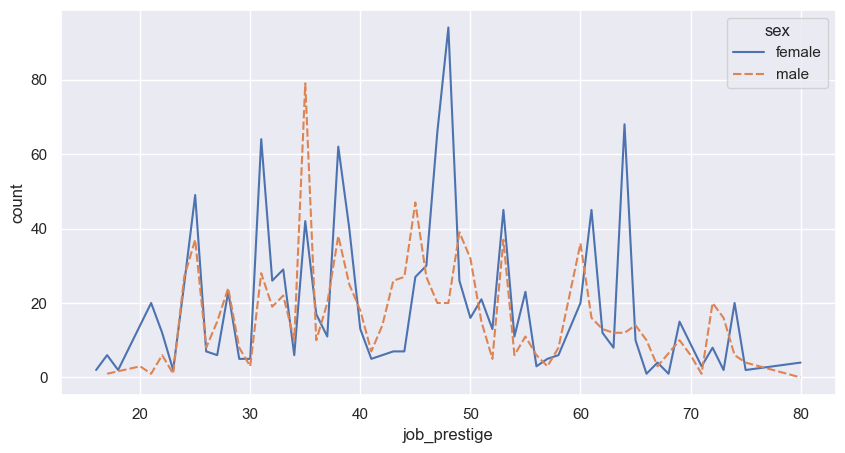

In [213]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='job_prestige', y='count',
             hue='sex', style='sex',
             data=p4)

<Axes: xlabel='job_prestige', ylabel='income'>

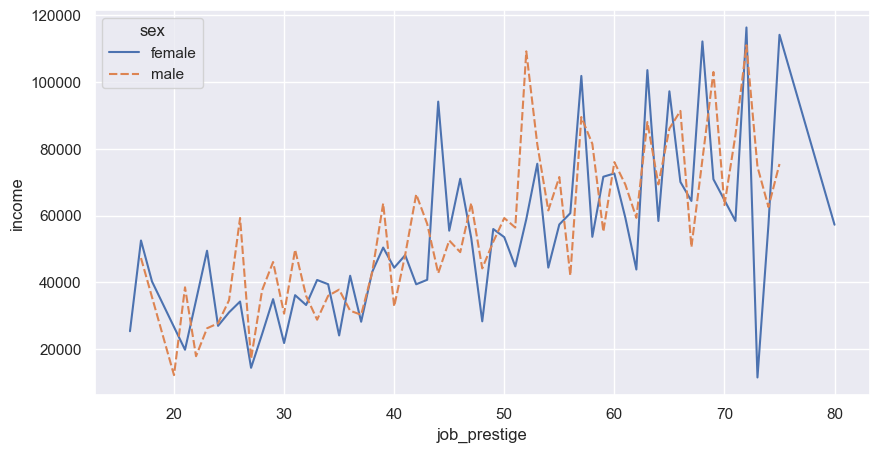

In [214]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='job_prestige', y='income',
             hue='sex', style='sex',
             data=p4)

In [222]:
p4_men = p4[p4.sex == 'male']
p4_men = p4_men.rename(columns={'sex': 'male', 'count': 'men_count', 'income': 'men_income'})
p4_women = p4[p4.sex == 'female']
p4_women = p4_women.rename(columns={'sex': 'female','count': 'women_count', 'income': 'women_income'})
p4_diff = pd.merge(p4_men, p4_women, how='outer', on='job_prestige')
p4_diff = p4_diff.assign(count_diff = p4_diff.men_count - p4_diff.women_count)
p4_diff = p4_diff.assign(income_diff = p4_diff.men_income - p4_diff.women_income)
p4_diff

,job_prestige,male,men_count,men_income,female,women_count,women_income,count_diff,income_diff
0,16.0,NaN,NaN,NaN,female,2.0,25411.250000,NaN,NaN
1,17.0,male,1.0,47317.500000,female,6.0,52575.000000,-5.0,-5257.500000
2,18.0,NaN,NaN,NaN,female,2.0,40307.500000,NaN,NaN
3,20.0,male,3.0,12267.500000,NaN,NaN,NaN,NaN,NaN
4,21.0,male,1.0,38555.000000,female,20.0,19864.587500,-19.0,18690.412500
5,22.0,male,6.0,17933.916667,female,12.0,34637.007600,-6.0,-16703.090933
6,23.0,male,1.0,26287.500000,female,2.0,49508.125000,-1.0,-23220.625000
7,24.0,male,27.0,27780.370370,female,25.0,27016.540000,2.0,763.830370
8,25.0,male,37.0,34712.387600,female,49.0,31058.591837,-12.0,3653.795763
9,26.0,male,8.0,59316.011400,female,7.0,34298.928571,1.0,25017.082829


Text(0.5, 1.0, 'Income Difference (Men - Women) by Job Prestige')

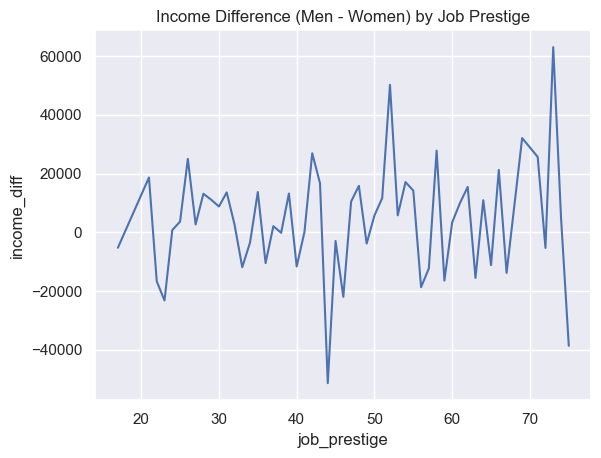

In [216]:
sns.lineplot(x='job_prestige', y='income_diff', data=p4_diff)
plt.title('Income Difference (Men - Women) by Job Prestige')

In [217]:
print(p4_diff[p4_diff.income_diff > 0].shape[0])
print(p4_diff[p4_diff.income_diff == 0].shape[0])
print(p4_diff[p4_diff.income_diff < 0].shape[0])

34
0
20


In [218]:
print(p4_diff['income_diff'].mean())
print(p4_diff.loc[p4_diff['income_diff'].idxmin()]['job_prestige'])
print(p4_diff['income_diff'].min())
print(p4_diff.loc[p4_diff['income_diff'].idxmax()]['job_prestige'])
print(p4_diff['income_diff'].max())

4149.431519145973
44.0
-51392.64966349207
73.0
63083.8864


<Axes: xlabel='job_prestige', ylabel='income_diff'>

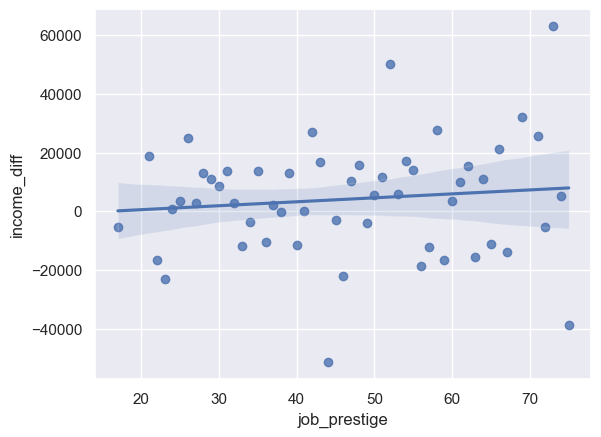

In [219]:
sns.regplot(x='job_prestige', y='income_diff', data=p4_diff)

In [227]:
p4_diff2 = p4_diff.dropna()

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(p4_diff2['job_prestige'], p4_diff2['income_diff'])

print(f"y = {intercept:.2f} + {slope:.2f}x, R^2 = {r_value**2:.2f}, p = {p_value:.2f}")

y = -2135.23 + 134.72x, R^2 = 0.01, p = 0.42


To answer this question I first found the mean of the men's and women's salaries, which are $53,314.63 and $47,191.02 respectively for a difference of $6,123.60. As a ratio of women to men it's .885 meaning that women make 88-89% of what men make. Then I calculated the median of both men and women which was equal at $38,555 indicating there is no difference. To investigate further I grouped the dataframe by prestige level and sex and made a line plot of mean income per prestige level for men and women. While the graphic was interesting I ultimately found it not helpful in answering the question. Next I sought to find the difference in mean salary between men and women at each prestige level. I graphed this with another line plot and found it easier to read though but it needed some help since there were many point above the 0 line as below. To help understand I found that there were 34 prestige levels with a positive difference (men making more than women), 20 prestige levels with a negative difference, and no presitge levels with no difference (equal pay). The mean of the differences is $4,149.43 indicating that men make more overall, but we knew that. There are some extreme differences both directions. For example, with a prestige level of 44, women make more than men of average by $51,392.65 and at a prestige level of 73 men make more on average by $63,083.89. Both of these could have an effect on the mean of the difference, and since the prestige level is higher for the male difference could explain the perception that men make more at higher levels of prestige. Looking at the line plot however, there is no real trend (up or down) as the graph bounces up and down throughout. To get a clearer look at the trend I plotted a regplot of the prestige level vs income difference and you can see a slight positive slope. With the 95% confidence shaded on the regplot, the 0 line was completely contained within the interval making no difference in salary a realistic possibility at each prestige level. The linear regression equation is y = -2135.23 + 134.72x meaning that for every 1 increase in prestige, men are expected to make more than women by $134.72. This has a p-value of 0.42 meaning there is not convincing evidence that this slope is not 0. All this leads me to believe that the difference in mean salary between men and women is not due to prestige level.

I started down a road of doing something with counts, but then I realized the difference are most likely due to the unequal surveying of men and women and therefore not useful. I just didn't take out the code...